# Entropy 
## I: Uniformely distributed microstates 


We want to write a function **random_machine.py** using *def* that simulates the following process: We with a set of $N$ dice all showing the same number, i. e. pips or *micro states*, face up (see image below). Now, we pick one die randomly and roll it and put it back. In the next step we pick a die randomly again, roll it and put it back and so on.

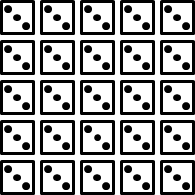

For each time step, calculate the **Entropy S** <br>
<br>
$S = - \Sigma_{i=1}^{6}\,\,p_i\, ln(p_i)$<br>
<br>
of the system, where $p_i = n_i/N$<br>
<br>
with $n_i$ being the number of those dice showing the number $i$ face up (= having the same state *i*) at the particular time step $t$.<br>
<br>
The function also generates a plot of $S$ over time, compared to the maximum value of $S = ln(6)$ and a histogram of the states of the dice after $M$ rolls.<br>
<br>
We want to explore the following questions:<br>
 - How does the entropy $S$ evolve in time for small $N = 5, 10, 15$ and for large $N>100$?<br>
 - How can we interpret this behaviour, what are possible conclusions?<br>
 - How does the entropy $S$ evolve in time if you start with a random configuration of the dice's states?

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#function illustrates the increase of entropy by rolling ONE die among N 
#dice each of M time steps by starting with a homogenious set and evolving
#with a poissonian time keeper (Gillespie alg)

def random_machine(N, M):
    
    I = 6 #number of states: I = 6 for a die

    #N dice, all set to state "three" for t=1
    Dice    = 3*np.ones((N,M))
    Entropy = np.zeros((M))
    
    Emax    = np.log(I)#max entropy
    e_calc  = np.zeros((I))
    
    #SETTING TIME
    #generate M random numbers between 0 and 1 (uniformly dist)
    R      = np.random.uniform(0,1,(M,1))
    Tau    = -np.log(R)/N
    T      = np.cumsum(Tau)
    
    #generate M random numbers between 0 and N-1 (uniformly dist)
    #for choosing die for every time step
    R_dice = np.random.randint(0,N,(M))
    
    #SETTING STATE of one randomly choosen die
    #generate M random numbers between 1 and I (uniformly dist)
    R_state = np.random.randint(1,I+1,(M))
    #choose die
    for i in range(M):#over time
        idx_die           = R_dice[i]
        Dice[idx_die, i:] = R_state[i]
        
        #calculating entropy
        for j in range(I):
            e_calc[j] = (Dice[:,i] == j+1).sum()/N + 1e-300 #avoiding log(0)
            
            
        Entropy[i] =  -np.dot(e_calc,np.log(e_calc))
        
    
    #plotting histogram of states
    labels, counts = np.unique(Dice[:,-1], return_counts = True)
    plt.bar(labels, counts, align = 'center', width = 0.1, color = 'k')
    plt.gca().set_xticks(labels)
    plt.xlabel('states')
    plt.ylabel('#')
    plt.title('states after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.show()
    
    #plotting evolution of entropy
    plt.plot(T, Entropy, '-*', linewidth = 2, color = [0.8, 0.1, 0.2],\
             label = '$S(t)$')
    plt.plot([0, T[-1]], [Emax, Emax], 'k-', linewidth = 3, label = '$S_{max}$')
    plt.xlabel('time')
    plt.ylabel('total entropy')
    plt.title('after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.legend()
    plt.show()

    return Dice

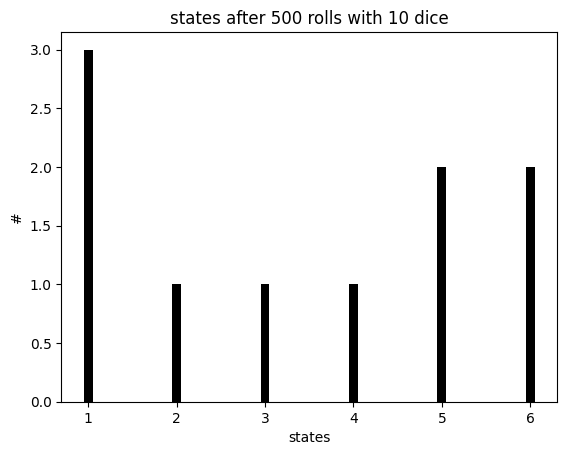

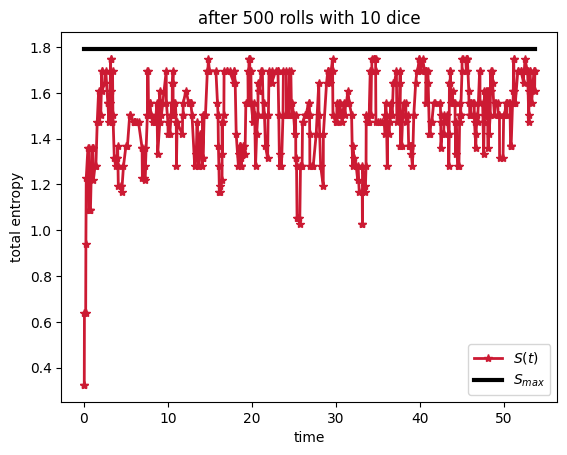

In [5]:
D = random_machine(10,500)

**Conclusions:**<br>
<br>
- for small $N$ entropy fluctuates, for large $N$, entropy inevitably reaches its maximum<br>
- it is a pure statistical process that the entropy of a *"macroscopic"* system ($N>100$) increases over time (= thermodynamical arrow of time). Since $S$ is a statistical quantity, it is dominated by fluctuations for small $N$, hence there is no arrow of time for *"microscopic"* systems (time symmetry)
- we observe the same process, but start at a high entropy state already so that the behaviour is less pronounced 

<br>

## II: Conservation of Energy leads to the Boltzmann Distribution

Based on **random_machine.py** we write another function, but this time we make sure that the **total(!) number of pips/states on the dice stays constant** throughout the simulation!<br>
You can achive that by rolling a randomly choosen die (as before), calculate the difference $d$ between its new state and its current state, for example $d= +3$, and then substract $1$ from three randomly choosen dice. If $d$ is negative, the values have to be added. Make sure, that no die has a state less than $1$.<br>

- What do we observe now?<br> 
- Does the entropy of the system reach its theoretical maximum?<br>
- What do you think which distribution best describes the histogram of the states now?<br>

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 16 02:55:48 2024

@author: MMH_user
"""

import numpy as np
import matplotlib.pyplot as plt

#function illustrates the increase of entropy by rolling ONE die among N 
#dice each of M time steps by starting with a homogenious set and evolving
#with a poissonian time keeper (Gillespie alg)

def random_machine_Boltzmann(N, M):
    
    I = 6 #number of states: I = 6 for a die

    #N dice, all set to state "three" for t=1
    Dice    = 3*np.ones((N,M))
    Entropy = np.zeros((M))
    
    e_calc  = np.zeros((I))
    
    #SETTING TIME
    #generate M random numbers between 0 and 1 (uniformly dist)
    R      = np.random.uniform(0,1,(M,1))
    Tau    = -np.log(R)/N
    T      = np.cumsum(Tau)
    
    #generate M random numbers between 0 and N-1 (uniformly dist)
    #for choosing die for every time step
    R_dice = np.random.randint(0,N,(M))
    
    #SETTING STATE of one randomly choosen die
    #generate M random numbers between 1 and I (uniformly dist)
    
    #choose die
    for i in range(M):#over time
    
        idx_die           = R_dice[i]
        current_state_die = Dice[idx_die, i]
        #picking energy from current die
        new_state_die     = np.random.randint(1, current_state_die+1)
        
        dE                = int(new_state_die - current_state_die)
        sign              = dE/abs(dE + 1e-300)
        
        if dE !=0:
            
            Dice[idx_die, i:] = new_state_die
            
            #re-distributing energy randomly
            for e in range(abs(dE)):
                e_next = -1
                while e_next <1: #making sure that no die has negative energy 
                    idx    = np.random.randint(0,N)
                    e_now  = Dice[idx, i]
                    e_next = -sign + e_now
                Dice[idx, i:] = e_next
        
        #calculating entropy
        for j in range(I):
            e_calc[j] = (Dice[:,i] == j+1).sum()/N + 1e-300 #avoiding log(0)
            
            
        Entropy[i] =  -np.dot(e_calc,np.log(e_calc))
        

    Emax = np.log(np.max(Dice))#max entropy
    
    #plotting histogram of states
    labels, counts = np.unique(Dice[:,-1], return_counts = True)
    plt.bar(labels, counts, align = 'center', width = 0.1, color = 'k')
    plt.gca().set_xticks(labels)
    plt.xlabel('states')
    plt.ylabel('#')
    plt.title('states after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.show()
    
    #plotting evolution of entropy
    plt.plot(T, Entropy, '-*', linewidth = 2, color = [0.8, 0.1, 0.2],\
             label = '$S(t)$')
    plt.plot([0, T[-1]], [Emax, Emax], 'k-', linewidth = 3, label = '$S_{max}$')
    plt.xlabel('time')
    plt.ylabel('total entropy')
    plt.title('after ' + str(M) + ' rolls with ' + str(N) + ' dice')
    plt.legend()
    plt.show()

    return Dice

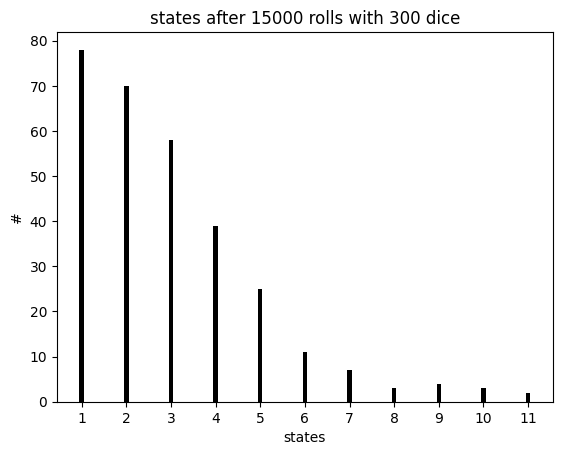

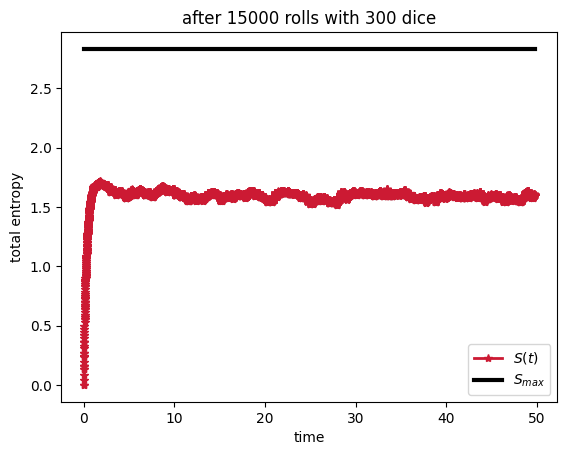

In [9]:
D = random_machine_Boltzmann(300, 15000)

The process shows the same dynamics but with the difference, that the theoretical maximum is not reached. The reason is the constrain $E_{tot} = const$. The result is the Boltzmann distribution. High energy states are less likely than low energy states. The gap between theoretical maximum and the maximum reached in the simulation can be explained by $F = U - TS$, where $F$ is the Free Energy, $U = E_{tot}$ the Internal Energy and $T = 1$.